# מבוא ל-DFT

In [3]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt


נזכיר את המשוואות המרכזיות שלנו:

$$x_{n}=\frac{1}{N}\sum_{k=0}^{N-1}\tilde{X}_{k}e^{i\frac{2\pi n}{N}k}\leftrightarrows\tilde{X}_{k}=\sum_{n=0}^{N-1}x_{n}e^{-i\frac{2\pi k}{N}n}$$

נשכח להמשך הדיון מהנרמול של $\frac{1}{N}$ למרות שלפעמים הוא חשוב

בנוסף למען הנוחות נסמן את שורש היחידה מסדר $N$ בתור $\omega=e^{-i\frac{2\pi}{N}}$

אפשר לראות כי זה פשוט מכפלה של וקטור במטריצה. נוכל להגדיר מטריצה:

$$D_{kn}=e^{-i\frac{2\pi k}{N}n}=\omega^{kn}\Rightarrow\tilde{X}_{k}=\sum_{n=0}^{N-1}D_{kn}x_{n}$$

המטריצה $D$ היא בגודל של $D\in\mathbb{C}_{N\times N}$ וכמובן מרוכבת.

נשים לב לכמה תכונות מיוחדות:
1. המטריצה סימטרית כלומר $D=D^{T}$
2. המטריצה יוניטרית (צריך להוסף נירמול). כלומר: $DD^{\dagger}=N\cdot I_{N\times N}$

ניתן דוגמא לאיך נראית $D_{4}\in\mathbb{C}_{4\times4}$

$$D_{4}=\begin{pmatrix}\omega^{0} & \omega^{0} & \omega^{0} & \omega^{0}\\
\omega^{0} & \omega^{1} & \omega^{2} & \omega^{3}\\
\omega^{0} & \omega^{2} & \omega^{4} & \omega^{6}\\
\omega^{0} & \omega^{3} & \omega^{6} & \omega^{9}
\end{pmatrix}=\begin{pmatrix}1 & 1 & 1 & 1\\
1 & -i & -1 & i\\
1 & -1 & 1 & -1\\
1 & i & -1 & -i
\end{pmatrix}$$

עכשיו כשיש לנו בראש את זה שפורייה זה הכפלה במטריצה יוניטרית. נוכל לשאול את עצמנו איזה וקטורים אנחנו יכולים להכפיל במטריצה הזו ולקבל וקטור שכולו אפסים חוץ ממקום אחד. טוב כמובן מההגדרות אלו בדיוק העמודות של המטריצה. ואכן נבדוק:

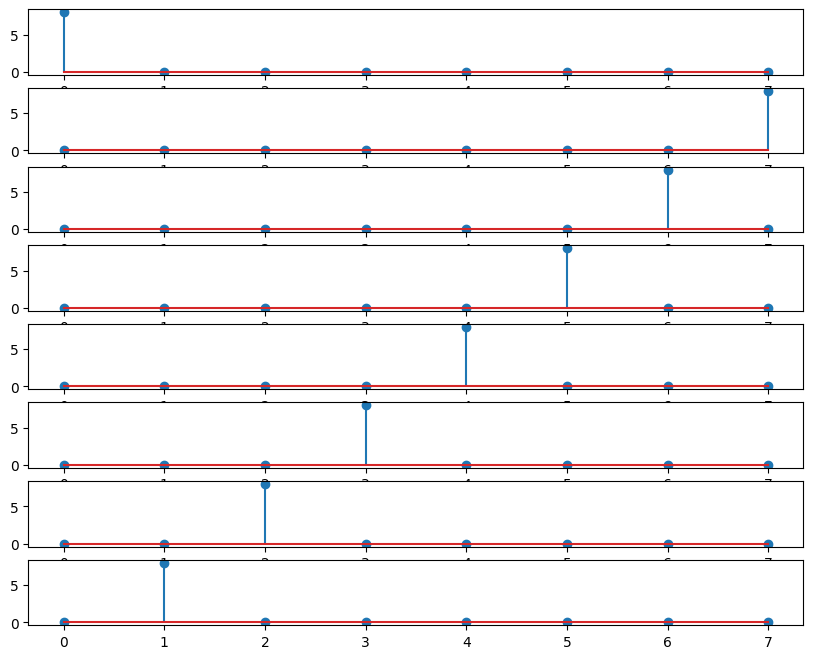

In [15]:
N = 8
root_n = np.exp(-2j*np.pi/N)

D = np.array([[root_n**(k*n) for n in range(N)] for k in range(N)])

fig,axes = plt.subplots(N,1,figsize=(10,8))
# iterate over rows and calculate the dft (fft)
for i, D_k in enumerate(D):
    D_k_f = fft.fft(D_k)
    axes[i].stem(range(N),np.abs(D_k_f))
plt.show()
    


נשים לב שהעמודות הן בדיוק מה שהיינו מגדירים "תדר טהור" ומה שמיוחד בו הוא מסיים כמות סיבובים שלמה על הקטע.

מה התדר הכי גבוה? השורה האמצעית שהיא פשוט
$\begin{pmatrix}1\\
-1\\
1\\
-1\\
\vdots\\
-1
\end{pmatrix}$
נשים לב שזה התדר הכי גבוה רק אם $N$ מספר זוגי. אחרת לא בדיוק מוגדר תדר הכי גבוה. כי יש לנו שתי שורות שהן "התדר הכי גבוה"

לדוגמא עבור $N=5$ יש את העמודה שעושה קפיצות של $\frac{2}{5}$ מעגל כל פעם ויש את העמודה שעושה $\frac{3}{5}$ מעגל כל פעם.

כבר כאן אנחנו מתחילים לראות שיש חשיבות לקשר בין הדגימה הראשונה והאחרונה. מה יקרה אם ניקח תדר שגורם לכך שהגל שלנו לא יכנס מספר פעמים שלם בקטע? נבדוק:


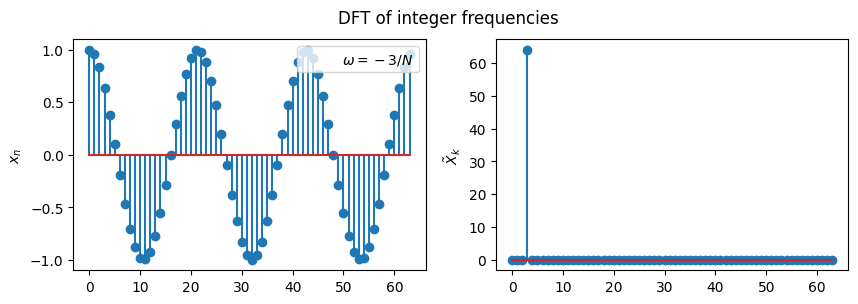

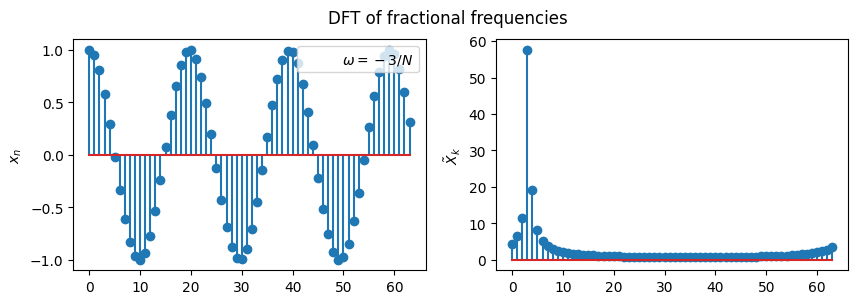

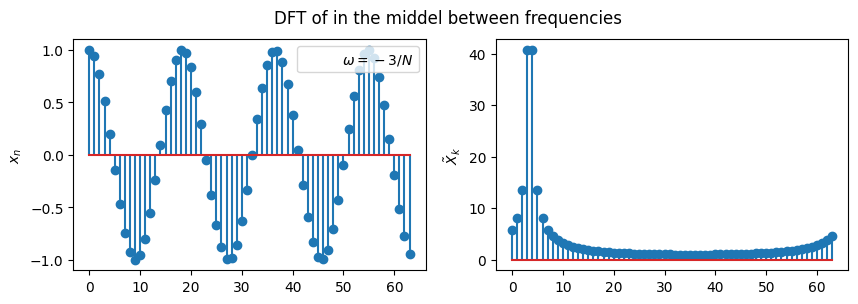

In [73]:
from matplotlib.patches import Rectangle
def plot_phasor_fft(N,w):
    n_axis = np.arange(N)
    phasor = np.exp(-2j*np.pi*w*n_axis)
    phasor_f = fft.fft(phasor)
    blanc_rect = Rectangle((0, 0), 0.1, 0.1, fc="w", fill=False, edgecolor='none', linewidth=0)
    fig,axes = plt.subplots(1,2,figsize=(10,3))
    axes[0].stem(n_axis,np.real(phasor))
    axes[0].set_ylabel(r'$x_{n}$')
    axes[1].stem(n_axis,np.abs(phasor_f))
    axes[1].set_ylabel(r'$\tilde{X}_{k}$')
    axes[0].legend([blanc_rect],[f'$\omega={int(w*N)} / N$'], loc='upper right')
    return fig,axes
    
N = 64
w_int = -3/N
w_frac = -3.25/N
w_middel = -3.5/N

fig,axes = plot_phasor_fft(N,w_int)
fig.suptitle('DFT of integer frequencies')
plt.show()

fig,axes = plot_phasor_fft(N,w_frac)
fig.suptitle('DFT of fractional frequencies')
plt.show()

fig,axes = plot_phasor_fft(N,w_middel)
fig.suptitle('DFT of in the middel between frequencies')
plt.show()

### סדר התדרים ב-DFT

כבר ראינו שהתדרים (או התדר) הכי גבוהים נמצאים באמצע המטריצה. למה זה הגיוני? משום שהתדר הכי גבוה הוא לקפוץ כל פעם חצי מעגל ואחרי זה אנחנו יכולים לפרש את הקפיצות בתור קפיצות קטנות יותר לצד השני. זה אומר שהציר של התדרים הוא ממש מוזר.

הוא מתחיל מהמקדם של תדר 0 שהוא מגיע מהשורה הראשונה במטריצה. השורה הזו היא פשוט המספר 1 ולכן מחשבת ממוצע. זה תדר 0 המוכר והאהוב.

לאט לאט התדרים עולים ובשלב כלשהו אחרי התדר הגבוה ביותר התדרים נהיים שליליים.

יש פונקציה מובנית שמחזירה לנו את ציר התדר עבור חישוב פורייה מסויים.

נסתכל עליה עבור $N=8$

In [83]:
N = 8
dt = 1 # 1/sample_rate
f_axis = fft.fftfreq(N,dt)
f_axis

array([ 0.   ,  0.125,  0.25 ,  0.375, -0.5  , -0.375, -0.25 , -0.125])

אבל מה אם אנחנו רוצים את כל התדרים השליליים בצד שמאל יש לזה פונקציה

In [84]:
fft.fftshift(f_axis)

array([-0.5  , -0.375, -0.25 , -0.125,  0.   ,  0.125,  0.25 ,  0.375])

ולכן נניח שיש לנו סיגנל שאנחנו רוצים לעשות לו fft ולצייר אותו

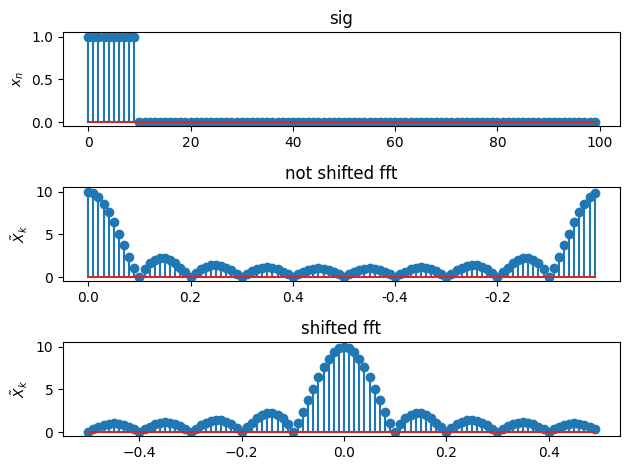

In [120]:
fs = 1
sig = np.concatenate((np.ones(10),np.zeros(90)))
N = len(sig)
t_axis = np.arange(N)/fs
f_axis = fft.fftfreq(N,1/fs)
sig_f = fft.fft(sig)

fig, axes = plt.subplots(3,1)
axes[0].stem(sig)
axes[0].set_title('sig')
axes[0].set_ylabel(r'$x_{n}$')
axes[1].stem(np.abs(sig_f))
axes[1].set_xticks(np.arange(N)[::20],f_axis[::20])
axes[1].set_title('not shifted fft')
axes[1].set_ylabel(r'$\tilde{X}_{k}$')
axes[2].stem(fft.fftshift(f_axis),fft.fftshift(np.abs(sig_f)))
axes[2].set_title('shifted fft')
axes[2].set_ylabel(r'$\tilde{X}_{k}$')
fig.tight_layout()

### הזזה מעגלית

In [167]:
def plot_fft(sig,fs, plot_phase=False,vertical=True):
    t_axis = np.arange(len(sig))/fs
    f_axis = fft.fftshift(fft.fftfreq(len(sig),1/fs))
    sig_f = fft.fftshift(fft.fft(sig))
    num_plots = 3 if plot_phase else 2
    plots_shape = (num_plots,1) if vertical else (1,num_plots)
    fig, axes = plt.subplots(*plots_shape, figsize=(10,2*num_plots))
    axes[0].stem(t_axis,sig)
    axes[0].set_ylabel(r'$x_{n}$')
    axes[1].stem(f_axis,np.abs(sig_f))
    axes[1].set_ylabel(r'$\left|\tilde{X}_{k}\right|$')
    if plot_phase:
        axes[2].stem(f_axis,np.angle(sig_f))
        axes[2].set_ylabel(r'$\arg\left(\tilde{X}_{k}\right)|$')
    return fig,axes

אנחנו יודעים שפורייה טרנספורם רציף אינווריאנטי להזזות (או יותר במדוייק מוכפל בפאזה שתלויה לינארית בתדר). מה קורה עם פורייה בדיד? מה זה בכלל אומר "להזיז" את הוקטור.

כבר קיבלנו לזה קצת רמיזות, הדגימה האחרונה והשנייה הם להסתובב על המעגל באותו קצב רק בכיוונים מנוגדים (במקרה ש-N אי זוגי) ובאופן כללי דיברנו לפני כמה שיעורים על זה שאנחנו ב-DFT מתייחסים לזמן כמעגלי. שזה אומר שאנחנו יכולים לחשוב על האות שלנו בתור רצף אינסופי של דגימות שחוזרות על עצמן במחזוריות של אורך האות שלנו $N$.

כלומר אנחנו רוצים לדעת מה קורה לוקטור אשר מזיזים אותו באופן מעגלי ואז עושים לו פורייה.
נבדוק:

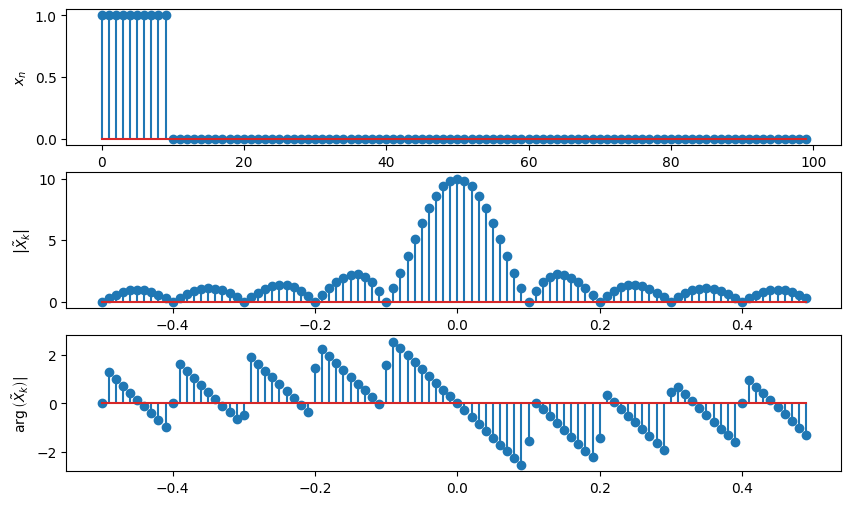

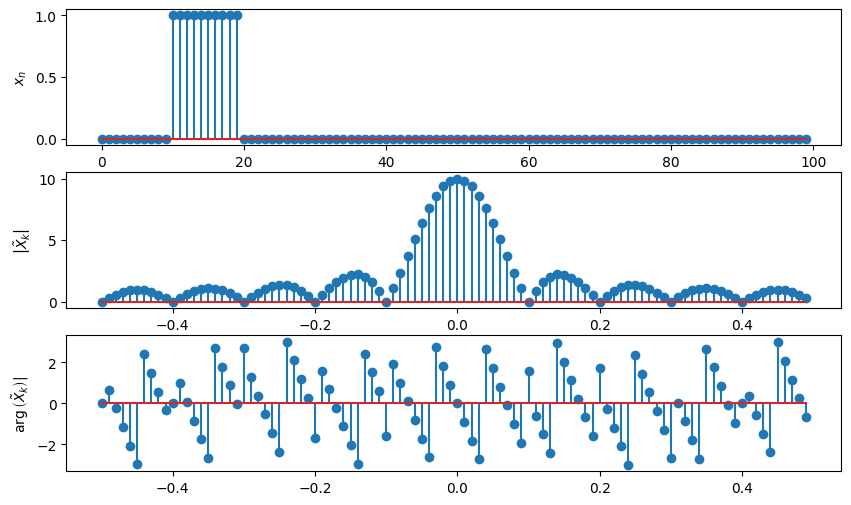

In [168]:
fs = 1
sig = np.concatenate((np.ones(10),np.zeros(90)))
fig, axes = plot_fft(sig,fs, plot_phase=True)
plt.show()
sig_roll = np.roll(sig,10)
fig, axes = plot_fft(sig_roll,fs, plot_phase=True)
plt.show()

קיבלנו בדיוק אותו הדבר באמפליטודה אבל הפאזה השתמנתה באופן לינארי לתדר. יחסית קל גם לראות את זה מתמטית:

$$Dx_{\left(n-n_{0}\right)\mod N}=\sum_{n=0}^{N-1}x_{\left(n-n_{0}\right)\mod N}e^{-i\frac{2\pi k}{N}n}=\sum_{n=0}^{N-1}x_{\left(n-n_{0}\right)\mod N}e^{-i\frac{2\pi k}{N}\left(n-n_{0}\right)}e^{i\frac{2\pi k}{N}n_{0}}=e^{i\frac{2\pi k}{N}n_{0}}\tilde{X}_{k}$$

> הזזה של וקטור דגימות בצורה **מעגלית** מייצר רק פאזה לינארית ולא משפיע על האמפליטודה של המקדמים במרחב התדר


### קונבולוציה סירקולרית

:
נשאלת השאלה איך תראה קורלציה בין שני אותות כאלו? בבירור הסוף של אות אחד ברגע שיעבור את הסוף של אות מסויים יחזור להתחלה שלו. פעולה כזו נקראת קורלציה סירקולרית.

> קורלציה סירקולרית
>
> $$\left(\vec{x}\circledast\vec{y}\right)\left[m\right]=\sum_{n=0}^{N-1}x\left[n\right]\cdot y\left[\left(m-n\right)\mod N\right]$$
>

ניתן להראות מקבליה למשפט הקונבולוציה אבל הפעם לאותות סופיים

:::{admonition} משפט הקונבולוציה לאותות סופיים

$$D\left(\vec{x}\circledast\vec{y}\right)\left[k\right]=\underset{D\vec{x}}{\underbrace{\tilde{X}\left[k\right]}}\cdot\underset{D\vec{y}}{\underbrace{\tilde{Y}\left[k\right]}}$$

:::

בואו נראה איך זה נראה בפועל

In [153]:
def circular_conv(x,y):
    x_f = fft.fft(x)
    y_f = fft.fft(y)
    return fft.ifft(x_f*y_f)

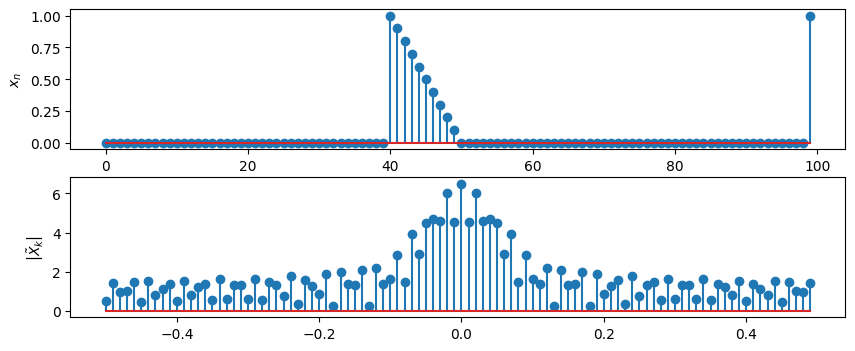

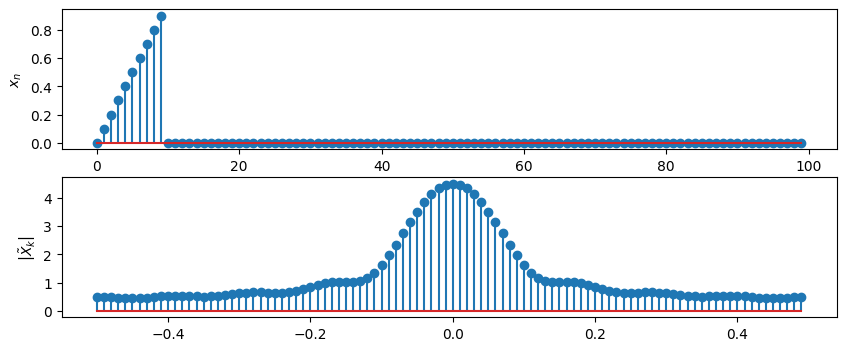

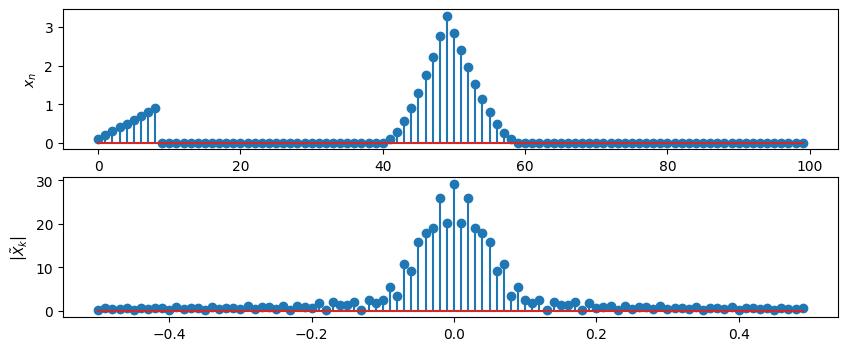

In [164]:
fs = 1
sig1 = np.concatenate((np.zeros(40),np.arange(10,0,-1)/10,np.zeros(49),np.ones(1)))
sig2 = np.concatenate((np.arange(10)/10,np.zeros(90)))
fig, axes = plot_fft(sig1,fs)
plt.show()
fig, axes = plot_fft(sig2,fs)
plt.show()

sig_conv = circular_conv(sig1,sig2)
fig, axes = plot_fft(sig_conv,fs)
plt.show()

בואות נראה איך זה נראה בפועל

מה אנחנו רואים כאן? אנחנו יכולים לראות שקיבלנו באמת קונבולוציה כמו שהיינו מצפים משתי ראמפות אבל נשים לב שה-"דלתא" בסוף הסיגנל הראשון גרמה ל-"זליגה" לתוך ההתחלה של הקורלציה!

איך אפשר להתמודד עם זה? ובכן צריך לרפד באפסים

### ריפוד באפסים


לריפוד באפסים יש כמה תפקידים חשובים בעיבוד אות דיגיטלי. ראינו את אחד מהם לפני רגע עם הקונבולוציה. אבל האמת שלריפוד אפסים יש אינטרפטציה מעניינת יותר.
בואו ניקח אות ונרפד אותו לאט לאט באפסים ונצייר את ה-DFT שלו כל פעם

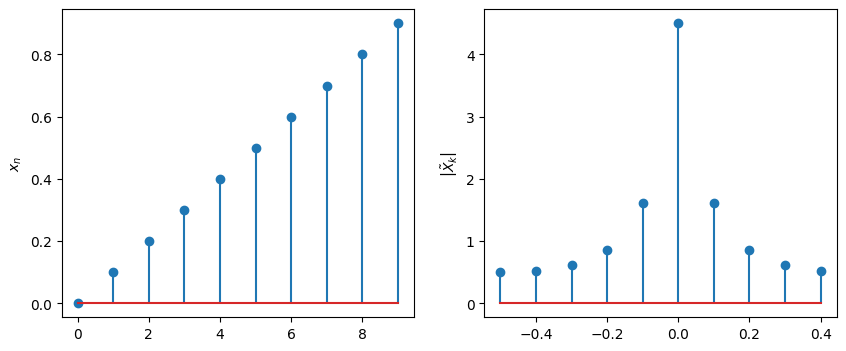

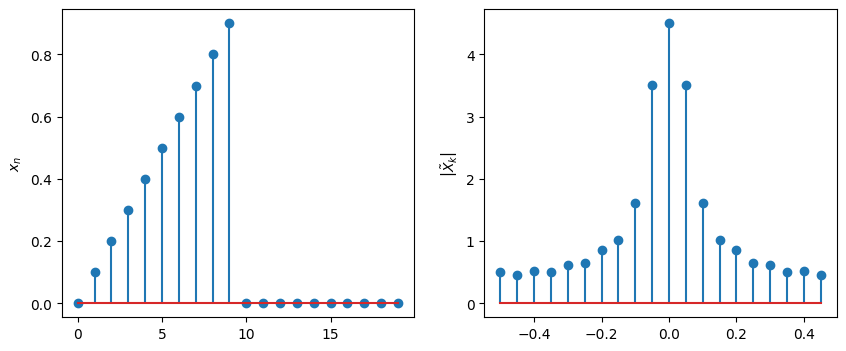

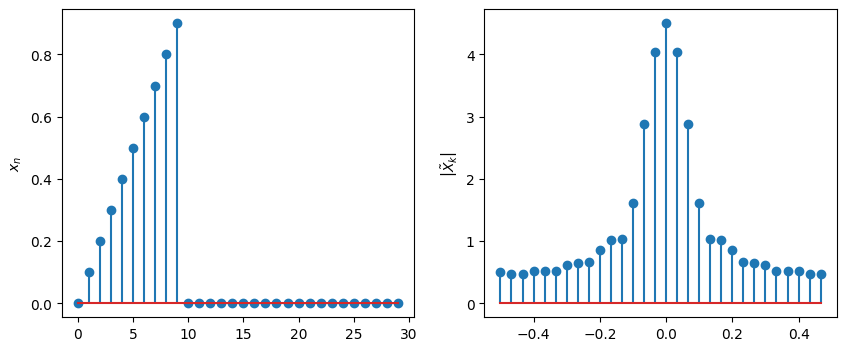

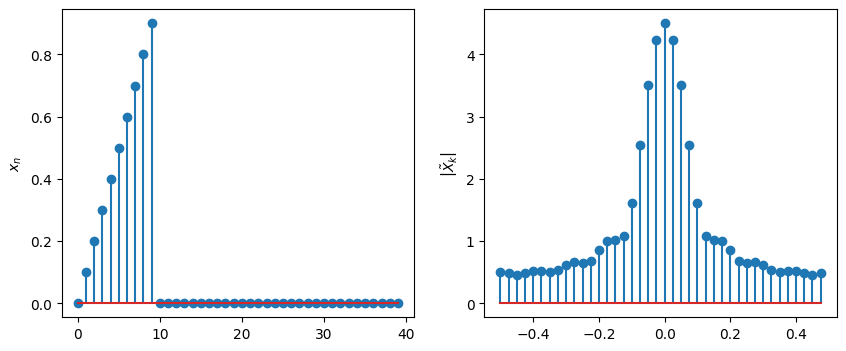

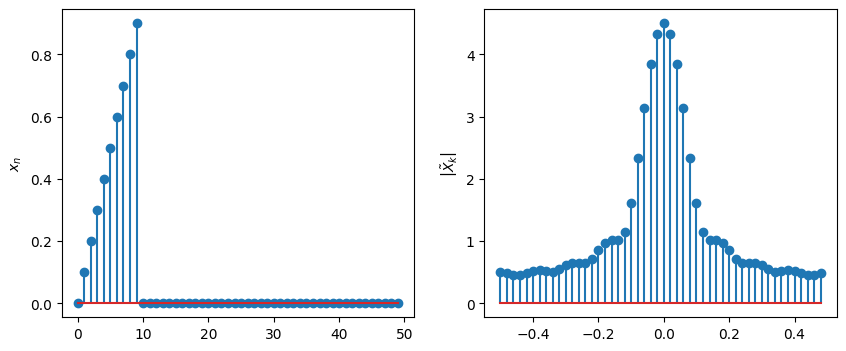

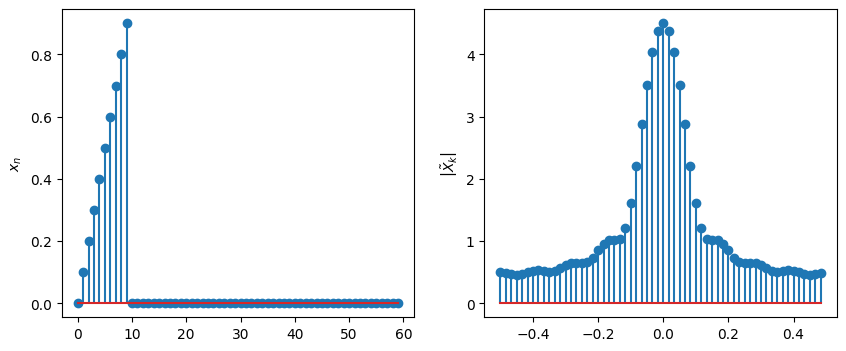

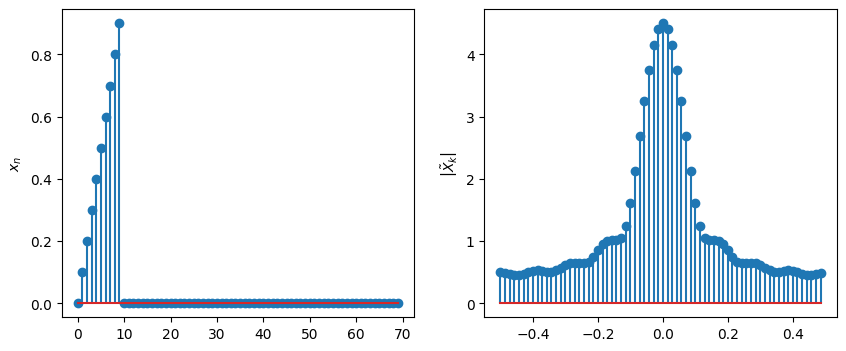

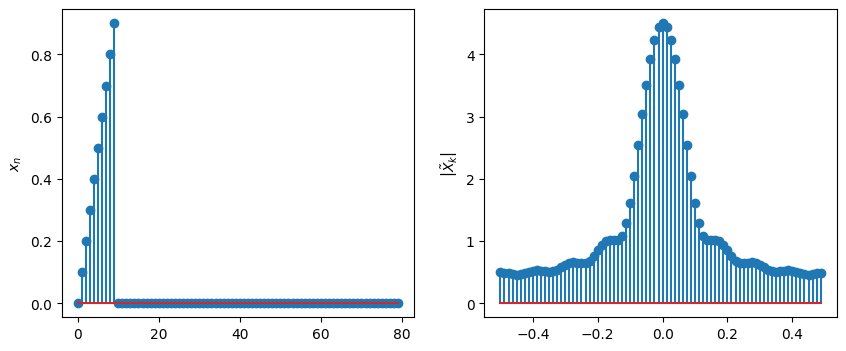

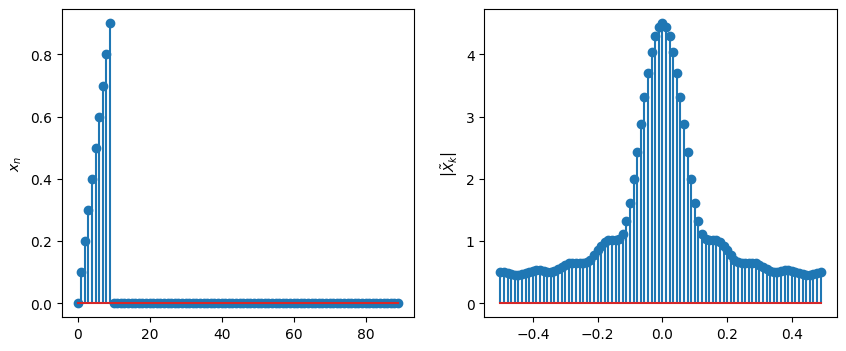

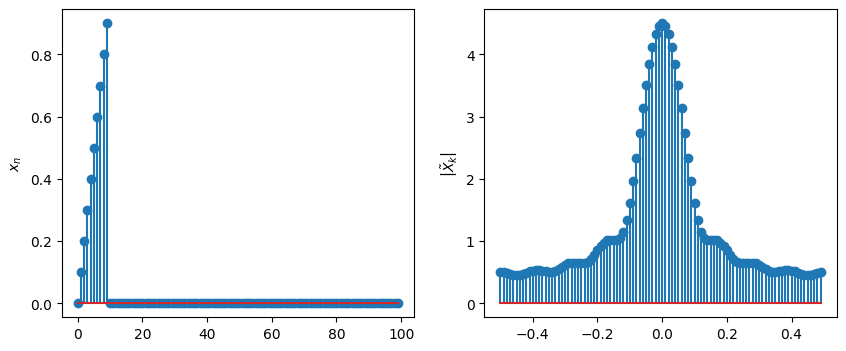

In [177]:
fs = 1
sig = np.arange(10)/10
for pad_size in np.arange(0,100,10):
    sig_pad = np.pad(sig,(0,pad_size))
    fig, axes = plot_fft(sig_pad,fs,vertical=False)
plt.show()


נשים את הסיגנל בלי הריפוד ועם הריפוד אחד על השני בתדר

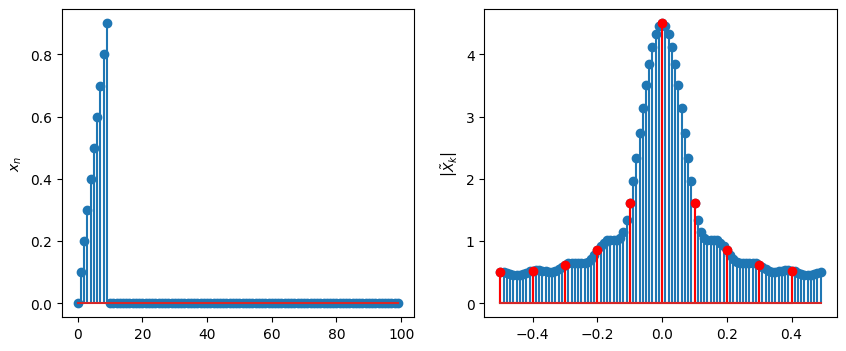

In [183]:
fs = 1
sig = np.arange(10)/10
pad_size = 90
sig_pad = np.pad(sig,(0,pad_size))
fig, axes = plot_fft(sig_pad,fs,vertical=False)
f_axis = fft.fftshift(fft.fftfreq(len(sig),1/fs))
sig_f = fft.fftshift(fft.fft(sig))
axes[1].stem(f_axis,np.abs(sig_f),linefmt='red')
plt.show()

אנחנו רואים שככל שאנחנו מוסיפים אפסים בזמן אנחנו בעצם מקבלים רזולוציה תדרית גבוהה יותר על פונקציה רציפה כלשהי. מה היא הפונקציה הזו? אם תחזרו אחורה בשיעורים תגלו שזו הייתה בדיוק ההגדרה של הפונקציה

$$\tilde{V}\left(\theta\right)=\frac{1}{\sqrt{2\pi}}\sum_{n=-\infty}^{\infty}V_{n}e^{-i\theta n}$$

נקודה למחשבה. מה היה קורה אם היינו מרפדים באפסים בתדר ואז מחזירים לזמן?
